<a href="https://colab.research.google.com/github/sethorus30/Data-Science/blob/master/Deeplearning_NLP_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
import scipy.stats as st

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

#word cloud
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#work on the data story, what are people upset and which , focus on Navies Bayes go back to the Navies Bayes homework

In [ ]:
NB_WORDS = 10005  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

We read in the csv with the tweets data and perform a random shuffle. It's a good practice to shuffle the data before splitting between a train and test set. That way the sentiment classes are equally distributed over the train and test sets.

We'll only keep the text column as input and the airline_sentiment column as the target.


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Copy of Tweets.csv to Copy of Tweets.csv


In [ ]:
#df = pd.read_csv('../input/Tweets.csv')
df = pd.read_csv('Copy of Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment', 'negativereason', 'airline']]
df.head()

text  ...     airline
5378   @SouthwestAir too long to wait for bags when t...  ...   Southwest
8439   @JetBlue Every crew member I dealt with in Orl...  ...       Delta
10158  @USAirways why did you Cancelled Flight flight...  ...  US Airways
5910   @SouthwestAir you should know the crew today o...  ...   Southwest
897    @united how is Mexico not international from t...  ...      United

[5 rows x 4 columns]

In [ ]:
pip install altair

In [ ]:
import altair as alt

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [ ]:
selection = alt.selection(type='interval')

In [ ]:
df['negativereason'] = df['negativereason'].dropna()

In [ ]:
df = df.dropna()

In [ ]:
df.negativereason.fillna(0)

871                           0
12226                         0
2985                          0
503                           0
5789                 Can't Tell
                  ...          
1993                Late Flight
13577               Late Flight
14183                         0
7330                          0
7341     Customer Service Issue
Name: negativereason, Length: 14640, dtype: object

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import altair as alt

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [ ]:
import numpy as np
df['negativereason'] = df['negativereason'].replace(np.nan, 'not known' )

In [ ]:
alt.Chart(df).mark_bar(size=30).encode(
    x="airline",
    y=alt.Y('count(negativereason)', stack="normalize", axis=alt.Axis(format='%')),
    color=alt.Color('negativereason', sort='ascending'),
        order=alt.Order('count(negativereason):Q', sort='descending')
).properties(width=400)
#convert them all to lower case 
#make a list of the ones that you want to use that 
#get rid of unknown , just for this chart 

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_bar(size=30).encode(
    x="airline",
    y=alt.Y('count(negativereason)', stack="normalize", axis=alt.Axis(format='%')),
    color=alt.Color('negativereason', sort='ascending'),
        order=alt.Order('count(negativereason):Q', sort='descending')
).properties(width=400)
#convert them all to lower case 
#make a list of the ones that you want to use that 
#get rid of unknown , just for this chart 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#adjust words for how many times they appear in the document 
text = df['text']

print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=10)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency

Streaming output truncated to the last 5000 lines.
@USAirways #ShoutOut 2 Kristie(sp?) from Gate4 @ PVD today. She's a #RockStar, was a tremendous help in a tough situation. #PromoteThatGirl
@AmericanAir you're running 5+ hours behind replying to anyone via Twitter. this is beyond unacceptable. I'm running out of time!
@AmericanAir i need someone to help me out
@AmericanAir worst company ever please do not fly with them I repeat please do not fly !! They will not credit you if you're delayed
@AmericanAir #AmericanAirlines on approach to mex.... http://t.co/se57dmjHiW
@AmericanAir yes we did make it home. But by no means am I happy. I've always chosen AA as my 1st choice when flying, I'm rethinking that...
@SouthwestAir LUV Ya Too!!!!  I will sing a song for y'all when I finally get on that plane back to Nashville!!! #LOVESOUTHWESTAIR
@united yes, I know that. The question is "why is that still the case"? #fail
@USAirways And you took away my 1st class seat.  Love being a Chairman Prefe

In [ ]:
df #get the different twitter handles for each airline, what are the positive and negative things that are said about the airlins

text  ...     airline
7367   @JetBlue yes, please get me the seats we paid ...  ...       Delta
12987  @AmericanAir need2know if Ill be able to reach...  ...    American
1325               @united hi -- @united was. Thank you!  ...      United
14623  @AmericanAir Love the new planes for the JFK-L...  ...    American
13595  @AmericanAir interested in possibly changing m...  ...    American
...                                                  ...  ...         ...
2543   @united Yes, myself and about 200 other people...  ...      United
10416  @USAirways I should also add the weather condi...  ...  US Airways
13847  @AmericanAir I already landed! But, if you sti...  ...    American
4635   @SouthwestAir  I sent a email to customer rela...  ...   Southwest
11660  @USAirways Being put back on hold for what has...  ...  US Airways

[14640 rows x 4 columns]

In [ ]:
df['🎀'] = df['text'].apply(lambda x: "🎀" in x)

In [ ]:
df['🎀'] = df['🎀'].astype(int)

In [ ]:
df['Text_Length'] = df.text.apply(lambda x: len(x))

In [ ]:
df['#_capital_leters'] = df['text'].str.findall(r'[A-Z]').str.len()

In [ ]:
df['percentage_of_capital_letters'] = df['#_capital_leters']/df['Text_Length']

In [ ]:
df['Greater_than_50%_capital_letters'] = df['percentage_of_capital_letters'].apply(lambda x:  x>= .5 )

In [ ]:
df['Greater_than_50%_capital_letters'] = df['Greater_than_50%_capital_letters'].astype(int)

In [ ]:
pip install textstat

     |████████████████████████████████| 101 kB 2.6 MB/s 
     |████████████████████████████████| 2.0 MB 11.1 MB/s 


In [ ]:
import textstat
df['reading_level'] = df['text'].apply(lambda x :textstat.flesch_reading_ease(x))

In [ ]:
df['reading_level']

4956      46.78
3190      68.44
9130      70.13
13775     49.15
3192      83.66
          ...  
7765     105.35
3592      74.69
7771      89.75
8434      10.56
4758      48.13
Name: reading_level, Length: 14640, dtype: float64

In [ ]:
df.describe()

Text_Length  ...  reading_level
count  14640.000000  ...   14640.000000
mean     103.822063  ...      67.997838
std       36.277339  ...      22.179180
min       12.000000  ...    -220.230000
25%       77.000000  ...      57.610000
50%      114.000000  ...      71.140000
75%      136.000000  ...      82.650000
max      186.000000  ...     115.130000

[8 rows x 5 columns]

In [ ]:
df[['reading_level']].describe()

reading_level
count   14640.000000
mean       67.997838
std        22.179180
min      -220.230000
25%        57.610000
50%        71.140000
75%        82.650000
max       115.130000

In [ ]:
df

text  ... reading_level
11116  @USAirways a $75 change is ok most of the time...  ...         75.88
10396                     @USAirways so far no call back  ...         90.77
13509  @AmericanAir  help. Flight to Dallas was Cance...  ...         84.17
14310  @AmericanAir Tired of sitting on a delayed #17...  ...         66.74
8794   @JetBlue the TV. Wifi was spotty. It's just a ...  ...         91.27
...                                                  ...  ...           ...
6882   @JetBlue - Definitely no note from whoever sto...  ...         45.42
12392  @AmericanAir @USAirways stated before I'm not ...  ...         83.15
1553   @united Missed KTM flight due to ur Cancelled ...  ...         63.05
6884   @JetBlue - Hopefully that will help someone in...  ...         59.80
2784   @united Can't beat the storm out of town if yo...  ...         64.04

[14640 rows x 9 columns]

In [ ]:
df = df.assign(United = lambda x: ((x.airline_sentiment=="negative") & (x.airline=="United")) )

In [ ]:
df.United = df.United.astype(int)

In [ ]:
df = df.assign(American = lambda x: ((x.airline_sentiment=="negative") & (x.airline=="American")) )

In [ ]:
df.American = df.American.astype(int)

In [ ]:
df = df.assign(Southwest = lambda x: ((x.airline_sentiment=="negative") & (x.airline=="Southwest")) )

In [ ]:
df.Southwest = df.Southwest.astype(int)

In [ ]:
df = df.assign(US_Airways = lambda x: ((x.airline_sentiment=="negative") & (x.airline=="US Airways")) )

In [ ]:
df.US_Airways = df.US_Airways.astype(int)

In [ ]:
df = df.assign(Delta = lambda x: ((x.airline_sentiment=="negative") & (x.airline=="Delta")) )

In [ ]:
df.Delta = df.Delta.astype(int)

In [ ]:
df = df.assign(Virgin_America = lambda x: ((x.airline_sentiment=="negative") & (x.airline=="Virgin America")) )

In [ ]:
df.Virgin_America = df.Virgin_America.astype(int)

'😂': 'face with tears of joy'}                                      21
{'👍': 'thumbs up'}                                                   20
{'😊': 'smiling face with smiling eyes'}                              19
{'😡': 'pouting face'}                                                16

In [ ]:
import emoji

ModuleNotFoundError: ignored

In [ ]:
df

text  ... reading_level
13523  @AmericanAir I am still waiting for that call ...  ...         88.74
5295   @SouthwestAir I never got my flight confirmati...  ...         79.97
8509   @JetBlue #JetBlueBOS What's up with luggage fo...  ...         76.72
11131  @USAirways @AmericanAir Will you be destroying...  ...         53.37
1672   @united Thank y'all for being an amazing airli...  ...         78.59
...                                                  ...  ...           ...
11828  @USAirways hundreds of people in line and less...  ...         79.60
4426   @SouthwestAir  on hold with customer service; ...  ...         48.13
11957  @AmericanAir cost me over 200 dollars because ...  ...         84.68
13134  @AmericanAir My pleasure, next AA flight - thi...  ...         38.32
9577   @USAirways Will tweet all day until I get \na ...  ...         92.12

[14640 rows x 9 columns]

In [ ]:
#use a reg expression to take the @ symbol, to create a new column call airline, than use a value count 

In [ ]:
extract_emojis(df.columns)

''

In [ ]:
😂😅☀💩🙈😣🙅👀❤😆😎😥😷👌😈↔👊🙉😳💁🍷😓😋❗👸😑➡💖👉🌏👎🍸♥🍻😐😫😞😉😡📲😒🎵😠🇬🚶💕✌😪✨👺💤😜🌟💜😍👏🙏😕😬💪💔😖🚫☺👿😤⤵💙😵🚪☕🐳🐴🆖💺😦😮😱😩✈💯🎉🇧⭐👠😻✔😃🐩😁🎀😘❌😏😀🆘🇸💝⛄😊🌴😲🔵✅😔⤴🍅⌚😭❄📱🙌🎲🌞👍💗🇺👋💘😢😄

SyntaxError: ignored

In [ ]:
😂.value_count

SyntaxError: ignored

In [ ]:
cnt
#check if alpha is true, if it is false then it is a string 

['@USAirways I spent more on the room &amp; transportation then I did the whole flight@AmericanAir Thanks for asking On second plane after maintenance issue, for flight from ORD to LIT. Sitting at gate in very very warm plane@AmericanAir my key point of confusion is whether I can make this change even though the initial Flight Booking Problems was on US Airways metal?@USAirways on 5:55 flight to CTL to catch 8pm flight to sfo. But empty seats on 4:15 flight which wasn\'t offered.  Awful service continues.@USAirways please please please let my plane back to the gate so I can get off as I will miss connection due to CLT closing. 2034@united  what is the real deal with the delay on flight UA 1032 from Denver to Vegas?@united received hotel but no food.  Also email for 3750 miles.  Last trip had 3 hr delay and 5000 miles - so less for Cancelled Flightlation?@united "We like hearing from you." So why haven\'t you replied to my tweet and/or email yet? https://t.co/caf2cx3gfi@united at MSP w/

In [ ]:
😬,'👿' '😐', 😣, 💖, 😥, 💪, 👏, 🙏', '☀','👋','👊','🍅','☕','⌚','😕',🙉','🍷','😀','👠','🔵','➡','😑','😒','✌',💁','😮','😢','🍸','͡','📲', '.','😍','😭',

In [ ]:
list(df.columns)
#remove single letter strings

['text',
 'airline_sentiment',
 '🎀',
 'K',
 'm',
 '?',
 'J',
 '😬',
 'A',
 'Y',
 '_',
 '👿',
 '😐',
 '8',
 'M',
 '🇬',
 '😣',
 '°',
 '}',
 'á',
 '☺',
 '💖',
 'd',
 'é',
 '😥',
 '💪',
 'e',
 '&',
 '👏',
 '🙏',
 '☀',
 '👋',
 '👊',
 '🍅',
 '☕',
 '⌚',
 '😕',
 '”',
 '🙉',
 '🍷',
 '😀',
 '👠',
 '🔵',
 '2',
 '➡',
 '😑',
 '͜',
 ',',
 '🇸',
 '–',
 'i',
 '😒',
 '✌',
 'É',
 '’',
 '-',
 '💁',
 '😮',
 'I',
 '😢',
 '🍸',
 '͡',
 '📲',
 '.',
 '😍',
 '😭',
 '❄',
 '=',
 '💯',
 '|',
 '🇺',
 '😄',
 'E',
 '💺',
 '💤',
 '💕',
 '😊',
 '💜',
 '🎉',
 '🎲',
 'R',
 'D',
 '‘',
 '👉',
 ':',
 'w',
 '[',
 '💩',
 '⭐',
 'c',
 'G',
 'í',
 '6',
 '…',
 '👀',
 '🌞',
 '⛄',
 '👌',
 'ã',
 '😘',
 'g',
 'B',
 '😋',
 '😈',
 '^',
 '😏',
 '😲',
 '😆',
 '👸',
 '❗',
 '\xa0',
 '😜',
 '🐳',
 '✈',
 '😓',
 '😁',
 '🐩',
 '🐴',
 '“',
 '⤵',
 '%',
 't',
 '😅',
 '😂',
 '✅',
 'S',
 '⤴',
 '😞',
 '👺',
 'â',
 'y',
 '✨',
 'ê',
 '🙅',
 '✔',
 '/',
 '😩',
 'n',
 '😖',
 '\n',
 '😫',
 'v',
 '😳',
 'O',
 'P',
 '(',
 '↔',
 '🚫',
 'b',
 '🇧',
 '€',
 'U',
 '💙',
 '❌',
 'p',
 '🆖',
 '😔',
 '!',
 '😃',
 '💝',
 '😦',
 '9',
 '💔',

In [ ]:
df.value_counts()

text                                                                                                                                          airline_sentiment  negativereason               airline     🎀  Text_Length  #_capital_leters  percentage_of_capital_letters  Greater_than_50%_capital_letters  reading_level
@AmericanAir This doesn't address my issue. I am on hold for 30 min to speak with an agent.                                                   negative           Customer Service Issue       American    0  91           4                 0.043956                       0                                 87.72            2
@AmericanAir if by near the gate you mean sitting on the plane for almost 2 hours, then yeah.                                                 negative           Late Flight                  American    0  93           2                 0.021505                       0                                 87.05            2
@AmericanAir  800 number will not even let yo

In [ ]:
list(df.sum(axis=0))

['@AmericanAir  CXL flight. rebooked 2 PAX no problems. Thank you and everyone at AA for helping us all out!@USAirways been on hold way to long!  Is this the best level of service you can provide? - one hour+ is too long!@USAirways nice touch with using my first name.  Very intimate.  I\'ll be filing a claim soon to be reimbursed. Have a us airways day!@AmericanAir looks like I have. Best I can hope for I guess. It\'s on us air, so I don\'t think I\'ll get miles on Alaska. Which sucks.Stop this madness RT @JetBlue: Our fleet\'s on fleek. http://t.co/7x9uSbj2FV@USAirways rebooked me after i missed my flight..never called me and i didnt check my email.  I (cont) http://t.co/uTfDhxa8pU@United  great way to start my vacation with an on time departure! Looking forward to my global first class suite!@AmericanAir Flight AAL65 declared state of emergency? Squawking 7700...@VirginAmerica pilot says we expect a choppy landing in NYC due to some gusty winds w/a temperature of about 5 degrees &amp

In [ ]:
import nltk

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import webtext
from nltk.probability import FreqDist
 
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [ ]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#w_tokenizer = nltk.word_tokenize
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

#df = pd.DataFrame( columns= 'text')
df['text_lemmatized'] = df.text.apply(lambda x: lemmatize_text(x))

In [ ]:
df.loc[df['text'].str.contains("ing"),'text']

795      @united again I ask, who can I call to get thi...
13864    @AmericanAir @SouljaCoy what is AA going to do...
11768    @USAirways @Jack_Kairys (2/2) and another sent...
6572     @SouthwestAir - just talking to customer servi...
10115    @USAirways @ALfamilyoffour maybe if there was ...
                               ...                        
2866     @united On the plane but thanks! Maybe don't l...
6910     @JetBlue there were seats but after waiting on...
1723     @united, maybe don't play the video about how ...
3275     @united can you maybe have more than 1 person ...
3597     @united you can't claim "weather" with your ha...
Name: text, Length: 6238, dtype: object

In [ ]:
df['text_lemmatized'].to_csv('name.csv', index =  False)

In [ ]:
df['text_lemmatized'][9325]

['@USAirways',
 'THANK',
 'YOU',
 'for',
 'resolving',
 'the',
 'issue.',
 'On',
 'direct',
 'flight',
 'to',
 'sfo',
 'from',
 '@united']

In [ ]:
df['text']

10759    @USAirways Nightmarish customer service. Furth...
5021     @SouthwestAir fyi the link in your baggage inc...
11090    @USAirways yes.  Every one of these on every f...
9272     @USAirways please stop asking me each week to ...
161      @VirginAmerica our flight into lga was Cancell...
                               ...                        
10812    @USAirways and next flight delayed as well. 52...
9710     @USAirways nightmare trying to get to Costa Ri...
13528    @AmericanAir this merger with @USAirways @usai...
717      @united just 1 last thing. U guys shouldn't be...
8467     @JetBlue The 13th Annual Martha's Vineyard Afr...
Name: text, Length: 14640, dtype: object

In [ ]:
df['text_lemmatized']

32       [@VirginAmerica, help,, left, expensive, headp...
4951     [@SouthwestAir, your, "complimentary", hotel, ...
10552    [@USAirways, what, happens, if, the, flight, t...
5166     [@SouthwestAir, yep, after, two, hour, and, th...
3144     [@united, I, have, a, LH, return, business, ti...
                               ...                        
5707     [@SouthwestAir, please, do., Hate, having, to,...
10408    [@USAirways, From, here, on, out, when, I, can...
4818     [@SouthwestAir, Thanks, for, helping, my, mom,...
14121    [@AmericanAir, you, wont, allow, calls?, My, h...
5393     [@SouthwestAir, Cancelled, Flightled, my, flig...
Name: text_lemmatized, Length: 14640, dtype: object

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
lemmatizer=WordNetLemmatizer()
for word in df['text']:
    print(lemmatizer.lemmatize(word))

Streaming output truncated to the last 5000 lines.
@AmericanAir DFW GATE 16 to BMI agent seriously is beyond incompetent.  Never flying AA again if can be avoided #fail #pathetic
@USAirways had mom sit for 3 hours waiting for a flight they ultimately Cancelled Flighted to give her a Tuesday morning flight...no compensation. Ugh
@USAirways the least comforting thing from your pilot after sitting on a stationary plane for 3 hours is "I don't really know what happened"
@SouthwestAir @FortuneMagazine Congratulations!
@JetBlue @martysg you *know* how I love you, JB, but honestly, when you have complex feedback, those pull-down sub-option forms=maddening.
@AmericanAir narrowly made standby...lots of snags this trip!
@USAirways yay for glitchy tracking system!  My bags made it to my destination and not Laguardia like the app said!
@SouthwestAir to start 2xdaily #B737-700 flights from #OrangeCounty to #Portland OR on 8AUG #avgeek
@americanair seriously, pls pls bring more people up to help us!

In [ ]:
#first step use the hash tags to figure out the total number of airlines, second step is to take the most common word for each hashtag
for text 

Data Cleaning

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)
df.head()

text  ...                                    text_lemmatized
11116   $75 change ok time open seats earlier flt no ...  ...  [@USAirways, a, $75, change, is, ok, most, of,...
10396                                   far no call back  ...              [@USAirways, so, far, no, call, back]
13509   help. Flight Dallas Cancelled Flightled morni...  ...  [@AmericanAir, help., Flight, to, Dallas, wa, ...
14310               Tired sitting delayed #1702 computer  ...  [@AmericanAir, Tired, of, sitting, on, a, dela...
8794    TV. Wifi spotty. It's nice feature country fl...  ...  [@JetBlue, the, TV., Wifi, wa, spotty., It's, ...

[5 rows x 10 columns]

In [ ]:
df['reading_level']

6716     78.25
13918    76.22
8272     67.08
1672     78.59
13093    64.04
         ...  
9135     75.88
8080     85.69
13354    46.44
4222     59.80
12317    80.28
Name: reading_level, Length: 14640, dtype: float64

In [ ]:
df.loc[:,["text","reading_level", "Text_Length", "#_capital_leters", "Greater_than_50%_capital_letters"]]

text  ...  Greater_than_50%_capital_letters
11252   flying Manchester international Philadelphia ...  ...                                 0
13229   How supposed Cancelled Flight can't online? w...  ...                                 0
3494                                         Thank you!!  ...                                 0
3442    For Grandma Ella's 80th, would love birthday ...  ...                                 0
14434   also not one single person counter answering ...  ...                                 0
...                                                  ...  ...                               ...
1559    Didn't know buying seat first class 'request'...  ...                                 0
9455    worry. Used initiative arriving much earlier ...  ...                                 0
2470   . much info share via tweet. Please send name ...  ...                                 0
6047    Learn give folks multiple flights day boardin...  ...                                 0
14312                                       awesome! Thx  ...                                 0

[14640 rows x 5 columns]

Train-Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

#MAKE DEEP LEARNING MODEL FOR EACH AIRLINE 

#just mentioned the features that I choose 

# Train data samples: 13176
# Test data samples: 1464


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.isnegative, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

#MAKE DEEP LEARNING MODEL FOR EACH AIRLINE 

#just mentioned the features that I choose 
#for precision recall 

# Train data samples: 13176
# Test data samples: 1464


In [ ]:
X_train.index

Int64Index([ 3994,  2789,   292,  3694, 11537,  6373,  4058,  9053,  8266,
             5639,
            ...
             3286, 11450, 10824,  1153, 12815, 11297,  7800, 10814, 11674,
            12394],
           dtype='int64', length=13176)

In [ ]:
X_train

9674      mom sit hours waiting flight ultimately Cance...
13334     answer phones. Trying change reservation able...
5751      three flights three check agents, not enough....
8518                           big board says leaving 8:30
476       Are plans short haul airline Europe? Would de...
                               ...                        
648       again, maybe  would care hear went whoever li...
11204     1917. Thanks hour layover LA too👍 Icing cake....
14068     Yes, says reservation cannot retrieved time. ...
9829        ...was Cancelled Flightled need locate baggage
10482                                           DM please?
Name: text, Length: 13176, dtype: object

In [ ]:
df.loc[X_train.index]

text  ...                                    text_lemmatized
3994    rude cust ser agents busy chatting, yelled bc...  ...  [@united, rude, cust, ser, agent, busy, chatti...
2789                         thanks! catch conection! :)  ...  [@united, :, thanks!, i, will, catch, my, cone...
292     Funny story, website broken, missing javascri...  ...  [@VirginAmerica, Funny, story,, your, website,...
3694    can't DM, not following. LLY144. Rebooked #UA...  ...  [@united, can't, DM,, you're, not, following.,...
11537                tell flight clt srq 5080 wait!!!!!!  ...  [@USAirways, tell, the, flight, from, clt, to,...
...                                                  ...  ...                                                ...
11297                            Sunday! Can't wait! See  ...  [@USAirways, on, Sunday!, Can't, wait!, See, y...
7800                                guys need live chat.  ...            [@JetBlue, you, guy, need, live, chat.]
10814                trying establish policy is. Thanks!  ...  [@USAirways, I, am, just, trying, to, establis...
11674   flt 5302 CLT DAY supposed depart 5:51; 6:20.....  ...  [@USAirways, flt, 5302, CLT, to, DAY, supposed...
12394   not sufficiently sorry actually *do* anything...  ...  [@AmericanAir, but, not, sufficiently, sorry, ...

[13176 rows x 10 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [ ]:
len(y_test)

1464

In [ ]:
y_test == 'negative'

7298      True
1568      True
7710      True
7995      True
3879      True
         ...  
12833    False
12250     True
10684     True
10873     True
2424      True
Name: airline_sentiment, Length: 1464, dtype: bool

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

Converting words to numbers

In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10005 words in dictionary
Top 5 most common words are: [('flight', 3549), ('not', 1441), ('no', 1352), ('get', 1215), ('t', 1093)]


In [ ]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 

" mom sit hours waiting flight ultimately Cancelled Flighted give Tuesday morning flight...no compensation. Ugh" is converted into [914, 436, 16, 46, 1, 6054, 9, 117, 166, 751, 167, 1, 3, 678, 1217]


In [ ]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[914, 436, 16, 46, 1, 6054, 9, 117, 166, 751, 167, 1, 3, 678, 1217]" is converted into [0. 1. 0. ... 0. 0. 0.]
For this example we have 14.0 features with a value of 1.


In [ ]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 

def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

" mom sit hours waiting flight ultimately Cancelled Flighted give Tuesday morning flight...no compensation. Ugh" is converted into [914, 436, 16, 46, 1, 6054, 9, 117, 166, 751, 167, 1, 3, 678, 1217]
"[914, 436, 16, 46, 1, 6054, 9, 117, 166, 751, 167, 1, 3, 678, 1217]" is converted into [0. 1. 0. ... 0. 0. 0.]
For this example we have 14.0 features with a value of 1.


In [ ]:
X_train_w_features = pd.DataFrame(X_train_oh)
X_train_w_features["percentage_of_capital_letters"] = df.loc[X_train.index, ["percentage_of_capital_letters"]]
#do this for test data set, leave y test and train alone 

In [ ]:
X_train_w_features["#_capital_leters"] = df.loc[X_train.index, ["#_capital_leters"]]

In [ ]:
X_train_w_features["Text_Length"] = df.loc[X_train.index, ["Text_Length"]]

In [ ]:
X_train_w_features["Greater_than_50%_capital_letters"] = df.loc[X_train.index, ["Greater_than_50%_capital_letters"]]

In [ ]:
X_train_w_features["reading_level"] = df.loc[X_train.index, ["reading_level"]]

In [ ]:
X_test_w_features = pd.DataFrame(X_test_oh)
X_test_w_features["Text_Length"] = df.loc[X_test.index, ["Text_Length"]]

In [ ]:
X_test_w_features["reading_level"] = df.loc[X_test.index, ["reading_level"]]

In [ ]:
X_test_w_features["#_capital_leters"] = df.loc[X_test.index, ["#_capital_leters"]]

In [ ]:
X_test_w_features["percentage_of_capital_letters"] = df.loc[X_test.index, ["percentage_of_capital_letters"]]

In [ ]:
X_test_w_features["Greater_than_50%_capital_letters"] = df.loc[X_test.index, ["Greater_than_50%_capital_letters"]]

In [ ]:
X_test_w_features = X_test_w_features.fillna(0)

In [ ]:
X_train_w_features = X_train_w_features.fillna(0)

In [ ]:
df.loc[X_train.index, ["percentage_of_capital_letters"]]

percentage_of_capital_letters
9674                        0.046667
13334                       0.023810
5751                        0.020000
8518                        0.031250
476                         0.046729
...                              ...
648                         0.085938
11204                       0.066176
14068                       0.060000
9829                        0.082192
10482                       0.156250

[13176 rows x 1 columns]

Converting the target classes to numbers

In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

#print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
#print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

In [ ]:
#X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

#assert X_valid.shape[0] == y_valid.shape[0]
#assert X_train_rest.shape[0] == y_train_rest.shape[0]

#print('Shape of validation set:',X_valid.shape)

In [ ]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_w_features, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)


Shape of validation set: (1318, 10010)


In [ ]:
NB_WORDS = 10010  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

In [ ]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()
#just creating the base model , 2 layer deep learning model. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640704    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 645,059
Trainable params: 645,059
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
def custom_f1(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
X_train_rest.shape

(11858, 10010)

In [ ]:
y_train_rest.shape

(11858, 3)

In [ ]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=[custom_f1, 'accuracy']) #balance accur, f1 macro

                  #model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=[custom_f1, 'accuracy']) 
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [ ]:
base_history = deep_model(base_model)

In [ ]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch')
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    

e can see here that the validation loss starts to increase as from epoch 4. The training loss continues to lower, which is normal as the model is trained to fit the train data as good as possible.

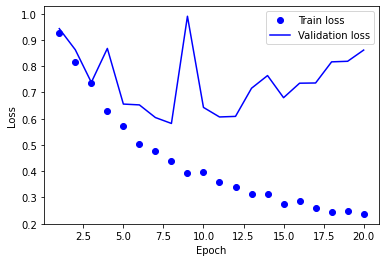

In [ ]:
eval_metric(base_history, 'loss')
#part of the reason for the distribution is due to filling all the nans with zero 
# the fact the validation loss is greater than the train loss is proof that this is a valid model

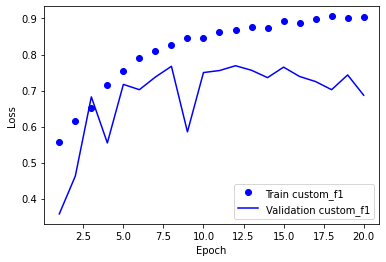

In [ ]:
eval_metric(base_history, 'custom_f1')
#validation set is not as consistent as train set
 

Just as with the validation loss, the validation accuracy peaks at an early epoch. After that, it goes down slightly. So to conclude, we can say that the model starts overfitting as from epoch 4.

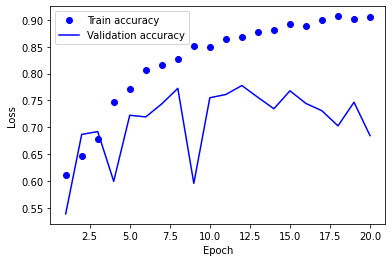

In [ ]:
eval_metric(base_history, 'accuracy') 


Handling overfitting

Now, we can try to do something about the overfitting. There are different options to do that.

Option 1: reduce the network's size by removing layers or reducing the number of hidden elements in the layers
Option 2: add regularization, which comes down to adding a cost to the loss function for large weights
Option 3: adding dropout layers, which will randomly remove certain features by setting them to zero

Reducing the network's size
We reduce the network's size by removing one layer and lowering the number of hidden elements in the remaining layer to 32.

In [ ]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(3, activation='softmax'))
reduced_model.summary()
#creating the reduced model was to deal with overfitting 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320352    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 320,451
Trainable params: 320,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduced_history = deep_model(reduced_model)

In [ ]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'bo', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'b', label='Validation Loss ' + model_name)
    plt.xlabel('Epoch')
    plt.ylabel("loss")
    plt.legend()
    plt.show()

We can see that it takes more epochs before the reduced model starts overfitting (around epoch 10). Moreover, the loss increases much slower after that epoch compared to the baseline model.

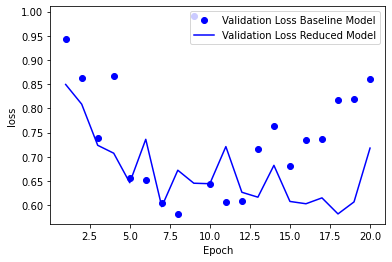

In [ ]:
compare_loss_with_baseline(reduced_history, 'Reduced Model')
#validation loss in reduced model is less overall 

Adding regularization
To address overfitting, we can also add regularization to the model. Let's try with L2 regularization.

In [ ]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(3, activation='softmax'))
reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                640704    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 645,059
Trainable params: 645,059
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reg_history = deep_model(reg_model)

For the regularized model we notice that it starts overfitting earlier than the baseline model. However, the loss increases much slower afterwards.

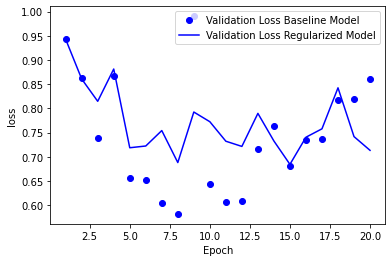

In [ ]:
compare_loss_with_baseline(reg_history, 'Regularized Model')
#Validation loss for both models are very close by the end 

Adding dropout layers
The last option we'll try is to add dropout layers.

In [ ]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
drop_model.summary()
#the drop model and reg model and reduced model is all to deal with the overfitting 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                640704    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 195       
Total params: 645,059
Trainable params: 645,059
Non-trainable params: 0
_________________________________________________________________


In [ ]:
drop_history = deep_model(drop_model)

The model with dropout layers starts overfitting a bit later than the baseline model. The loss also increases slower than the baseline model.

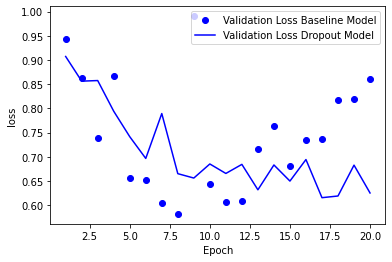

In [ ]:
compare_loss_with_baseline(drop_history, 'Dropout Model')
#validation loss is still going down but now it is starting to match the baseline model

Training on the full train data and evaluation on test data
At first sight the reduced model seems to be the best model for generalization. But let's check that on the test set.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
def test_model(model, epoch_stop):
    model.fit(X_train_w_features
              , y_train_oh
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test_w_features, y_test_oh)
    
    return results

In [ ]:
prediction = base_model.predict(X_test_w_features)

In [ ]:
from sklearn import svm

In [ ]:
prediction = base_model.predict_classes(X_test_w_features)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
prediction

array([[6.0991937e-01, 3.8729569e-01, 2.7849358e-03],
       [9.9944252e-01, 5.1750330e-04, 3.9917599e-05],
       [4.8780480e-06, 9.9999511e-01, 1.1992499e-16],
       ...,
       [4.4034117e-08, 1.0000000e+00, 2.4237222e-28],
       [6.8368828e-01, 3.0447960e-01, 1.1832027e-02],
       [9.9970406e-01, 1.6113836e-04, 1.3472939e-04]], dtype=float32)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
base_results = test_model(base_model, 4)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))

46/46 [==============================] - 0s 2ms/step - loss: 5.3905 - custom_f1: 0.7282 - accuracy: 0.7302
/n
Test accuracy of baseline model: 72.82%


In [ ]:
base_prediction = base_model.predict(X_test_w_features)

In [ ]:
base_prediction[:,0]>.5

array([False, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
base_prediction

array([[9.99883056e-01, 1.12654256e-04, 4.31645731e-06],
       [9.26476777e-01, 7.33941793e-02, 1.29008651e-04],
       [1.00000000e+00, 2.39614923e-08, 8.62080007e-09],
       ...,
       [1.00000000e+00, 6.38756409e-11, 1.66751023e-11],
       [9.62191105e-01, 3.78089026e-02, 3.76716202e-23],
       [1.60949491e-02, 9.83799338e-01, 1.05719722e-04]], dtype=float32)

In [ ]:
base_prediction # convert class probabilities into class labels

array([[3.1057280e-04, 3.3776014e-04, 9.9935168e-01],
       [9.9999964e-01, 1.9629863e-07, 6.3321849e-08],
       [2.7077159e-01, 6.3441372e-01, 9.4814718e-02],
       ...,
       [9.9991953e-01, 8.0382881e-05, 9.0369007e-08],
       [9.1049279e-04, 1.0427041e-06, 9.9908853e-01],
       [2.0673302e-01, 7.7338624e-01, 1.9880725e-02]], dtype=float32)

In [ ]:
#try to convert positive and neutral in 0 and negative into 1 

In [ ]:
import numpy as np
import pandas as pd
import os

from scipy.sparse import lil_matrix
from sklearn.metrics import fbeta_score


In [ ]:
def label_to_sm(labels, n_classes):
    sm = lil_matrix((len(labels), n_classes))
    for i, label in enumerate(labels):
        sm[i, label] = 1
    return sm

In [ ]:
base_prediction_sm = label_to_sm(labels=base_prediction, n_classes=3)
base_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       ...,
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
base_prediction

array([[9.99883056e-01, 1.12654256e-04, 4.31645731e-06],
       [9.26476777e-01, 7.33941793e-02, 1.29008651e-04],
       [1.00000000e+00, 2.39614923e-08, 8.62080007e-09],
       ...,
       [1.00000000e+00, 6.38756409e-11, 1.66751023e-11],
       [9.62191105e-01, 3.78089026e-02, 3.76716202e-23],
       [1.60949491e-02, 9.83799338e-01, 1.05719722e-04]], dtype=float32)

In [ ]:
base_prediction_sm = label_to_sm(labels=base_prediction, n_classes=3)
base_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
fbeta_score(y_test_oh, base_prediction_sm, average='macro', beta=0.5)

0.2269735145595365

In [ ]:
fbeta_score(y_test_oh, base_prediction_sm, average='macro', beta=0.5)

0.255304951982098

In [ ]:
fbeta_score(y_test_oh, base_prediction_sm, average='macro', beta=0.5)

0.2580277764805195

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test_oh, base_prediction_sm, average='macro')

0.26776176966490656

In [ ]:
f1_score(y_test_oh, base_prediction_sm, average='micro')

0.6068567766741428

In [ ]:
y_test_oh

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
len(y_test_oh)

383

In [ ]:
len(base_prediction)

1464

In [ ]:
pos_label

In [ ]:
import skl

In [ ]:
f1_score(y_test == 'negative', base_prediction[:,0]>.5)

0.8435448577680525

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test == 'negative', base_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.73      0.75      0.74       542
        True       0.85      0.84      0.84       922

    accuracy                           0.80      1464
   macro avg       0.79      0.79      0.79      1464
weighted avg       0.81      0.80      0.81      1464



In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test == 'negative', base_prediction[:,0])

0.8668775163890468

In [ ]:
base_prediction_sm

<1464x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1698 stored elements in List of Lists format>

In [ ]:
base_prediction_sm.todense()

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 1., 0.]])

In [ ]:
base_prediction_sm.todense()[:,0]

matrix([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [ ]:
f1_score(y_test_le, prediction, average='macro')

0.6976606029626256

In [ ]:
import numpy as np
import pandas as pd
import os

from scipy.sparse import lil_matrix
from sklearn.metrics import fbeta_score

In [ ]:
def label_to_sm(labels, n_classes):
    sm = lil_matrix((len(labels), n_classes))
    for i, label in enumerate(labels):
        sm[i, label] = 1
    return sm

In [ ]:
reduced_prediction = reduced_model.predict(X_test_w_features)

In [ ]:
reduced_prediction_sm = label_to_sm(labels=reduced_prediction, n_classes=3)
reduced_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
f1_score(y_test == 'negative', reduced_prediction[:,0]>.5)

0.8792569659442725

In [ ]:
print(classification_report(y_test == 'negative', reduced_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.84      0.70      0.76       542
        True       0.84      0.92      0.88       922

    accuracy                           0.84      1464
   macro avg       0.84      0.81      0.82      1464
weighted avg       0.84      0.84      0.84      1464



In [ ]:
roc_auc_score(y_test == 'negative', reduced_prediction[:,0])

0.8880532053693639

In [ ]:
reduced_results = roc_auc_score(y_test_oh, reduced_prediction)
print('/n')
print('roc_auc_score of reduced model: {0:.2f}%'.format(reduced_results))

/n
roc_auc_score of reduced model: 0.84%


In [ ]:
reg_prediction = reg_model.predict(X_test_w_features)

In [ ]:
roc_auc_score(y_test == 'negative', reg_prediction[:,0])

0.895353778166278

In [ ]:
f1_score(y_test == 'negative', reg_prediction[:,0]>.5)

0.8212226066897348

In [ ]:
f1_score(y_test == 'negative', reg_prediction[:,0]>.5)

0.8703609557702083

In [ ]:
print(classification_report(y_test == 'negative', reg_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.82      0.67      0.73       528
        True       0.83      0.91      0.87       936

    accuracy                           0.83      1464
   macro avg       0.82      0.79      0.80      1464
weighted avg       0.82      0.83      0.82      1464



In [ ]:
print(classification_report(y_test == 'negative', reg_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.84      0.70      0.76       542
        True       0.84      0.92      0.88       922

    accuracy                           0.84      1464
   macro avg       0.84      0.81      0.82      1464
weighted avg       0.84      0.84      0.84      1464



In [ ]:
roc_auc_score(y_test == 'negative', reg_prediction[:,0])

0.8287824879333392

In [ ]:
reg_results = roc_auc_score(y_test_oh, reg_prediction)
print('/n')
print('roc_auc_score of regularized model: {0:.2f}%'.format(reg_results))

/n
roc_auc_score of regularized model: 0.86%


In [ ]:
drop_prediction = drop_model.predict(X_test_w_features)

In [ ]:
f1_score(y_test == 'negative', drop_prediction[:,0]>.5)

0.8714666666666667

In [ ]:
print(classification_report(y_test == 'negative', drop_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.79      0.75      0.77       542
        True       0.86      0.89      0.87       922

    accuracy                           0.84      1464
   macro avg       0.83      0.82      0.82      1464
weighted avg       0.83      0.84      0.83      1464



In [ ]:
roc_auc_score(y_test == 'negative', drop_prediction[:,0])

0.9044952813953302

In [ ]:
drop_results = roc_auc_score(y_test_oh, drop_prediction)
print('/n')
print('roc_auc_score of dropout model: {0:.2f}%'.format(drop_results))

/n
roc_auc_score of dropout model: 0.86%


In [ ]:
drop_prediction_sm = label_to_sm(labels=drop_prediction, n_classes=3)
drop_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
f1_score(y_test_oh, drop_prediction_sm, average='macro')

0.26101413133832085

In [ ]:
f1_score(y_test_oh, drop_prediction_sm, average='micro')

0.6401630988786953

In [ ]:
f1_score(y_test_oh, drop_prediction_sm, average='weighted')

0.5038428518866768

In [ ]:
import numpy as np
from sklearn import linear_model

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_test

8229     negative
4227      neutral
12543     neutral
13160    negative
13805    positive
           ...   
6018     negative
9781     negative
9479      neutral
13564    negative
1733     negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
prediction = base_model.predict(X_test)

ValueError: ignored

In [ ]:
prediction = base_model.predict(y_train)

ValueError: ignored

In [ ]:
y_test

9023     negative
6507     negative
3597     negative
10934    negative
2612     positive
           ...   
7663     negative
12137    positive
8980     negative
10126    negative
542      negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
y_test_le

array([1, 1, 0, ..., 0, 0, 2])

In [ ]:
y_pred1=modelrf.predict(X_test_oh)

In [ ]:
y_pred1

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [ ]:
modelrf.fit(X_train_oh, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Machine Learning models

In [ ]:
#for penalty use l2 in logistic regression, hypertune c with the differant values, 1, 10, 100 , scoring method roc_auc

In [ ]:
df['isnegative'] = df['airline_sentiment'].apply(lambda x: 1*(x == 'negative'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            #'max_features': [.1, .2, .3, ],
            'max_depth': [5,10, 20, 30],
            'n_estimators': [10, 50, 100, 300, 500]
        },
    
        cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_test_w_features, y_test)
best_params = grid_result.best_params_

In [ ]:
print(best_params)
#max depth how deep it goes 
#n estimators how trees within the forest 

{'max_depth': 30, 'n_estimators': 300}


In [ ]:
##Use this for precision recall
best_rf = RandomForestClassifier(max_depth= 30, n_estimators= 300)

modelrf = RandomForestClassifier(max_depth= 30, n_estimators= 300)
# Train the model on training data
modelrf.fit(X_train_w_features, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_proba = modelrf.predict_proba(X_test_w_features)[:,1]

In [ ]:
prediction_test = modelrf.predict(X_test_w_features)

ValueError: ignored

In [ ]:
roc_auc_score(y_test,y_pred_proba )

0.8720023591980348

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

0.5327243069800314

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

0.5575870762622359

In [ ]:
#TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = modelrf.predict(X_test_w_features)
print(y_test_oh, prediction_test)

#from sklearn import metrics
#Print the prediction accuracy
#print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] [[1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]


In [ ]:
#TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = modelrf.predict(X_test_w_features)
print(y_test_oh, prediction_test)

#from sklearn import metrics
#Print the prediction accuracy
#print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data


[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] [0. 0. 0. ... 0. 0. 0.]


In [ ]:
modelrf2 = RandomForestClassifier(max_depth= 10, n_estimators= 500)
# Train the model on training data
modelrf.fit(X_train_w_features, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_scores = cross_val_predict(modelrf, X_test_w_features, y_test, cv=3,
                             method="predict_proba")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)


In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    recall_80_precision = recalls[np.argmax(precisions >= 0.80)]
    threshold_80_precision = thresholds[np.argmax(precisions >= 0.80)]
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold")
    plt.plot([threshold_80_precision, threshold_80_precision], [0., 0.8], "r:")
   # plt.axis([-4, 4, 0, 1])
    #plt.plot([0, threshold_80_precision], [0.8, 0.8], "r:")
    #plt.plot([0, threshold_80_precision], [recall_80_precision, recall_80_precision], "r:")
    #plt.plot([threshold_80_precision], [0.8], "ro") 
    #plt.plot([threshold_80_precision], [recall_80_precision], "ro")
    plt.grid(True)
    plt.legend()
    plt.show()

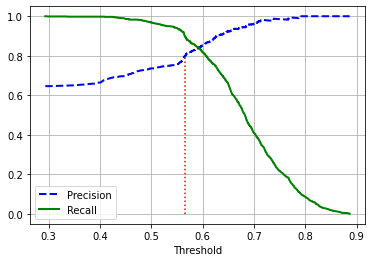

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#next step is to have it capture 90% of all negative comments(which is about )

In [ ]:
for i, thresh in enumerate(thresholds):
  print(thresh, precisions[i], recalls[i])

0.293601649329707 0.6464507236388698 1.0
0.29930510804596844 0.6462068965517241 0.9989339019189766
0.3052624866377801 0.6466528640441684 0.9989339019189766
0.31042865094087363 0.6470994475138122 0.9989339019189766
0.31383733138315945 0.6475466482377332 0.9989339019189766
0.3236183683891565 0.6479944674965422 0.9989339019189766
0.3304810602917525 0.6484429065743945 0.9989339019189766
0.3351525241765593 0.6488919667590027 0.9989339019189766
0.33705691869201526 0.6486486486486487 0.997867803837953
0.34039025202534856 0.6490984743411928 0.997867803837953
0.34516950142423264 0.6495489243580846 0.997867803837953
0.34953180313076676 0.65 0.997867803837953
0.3500609771010216 0.65045170257123 0.997867803837953
0.35059469743432653 0.650904033379694 0.997867803837953
0.35477530981980404 0.651356993736952 0.997867803837953
0.35621796983637904 0.6518105849582173 0.997867803837953
0.3576154948507972 0.6522648083623693 0.997867803837953
0.3601129734455067 0.6527196652719666 0.997867803837953
0.361301

In [ ]:
y_pred_thresh = 1*(y_pred_proba > .565)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67       526
           1       0.80      0.90      0.85       938

    accuracy                           0.79      1464
   macro avg       0.78      0.75      0.76      1464
weighted avg       0.79      0.79      0.78      1464



In [ ]:
y_score[:,1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
y_test

9170     negative
1288     negative
1133     negative
11619    negative
7363     negative
           ...   
6568      neutral
5156     positive
10648    negative
5158     positive
8153      neutral
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
y_test_oh[:,1]

array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

In [ ]:
y_scores[0][:,1]

array([0.5928184 , 0.62953308, 0.55843017, ..., 0.64746358, 0.65481204,
       0.64894293])

In [ ]:
y_scores

[array([[0.37183912, 0.62816088],
        [0.34851095, 0.65148905],
        [0.34556126, 0.65443874],
        ...,
        [0.38370764, 0.61629236],
        [0.43462533, 0.56537467],
        [0.39188161, 0.60811839]]), array([[0.77760225, 0.22239775],
        [0.79213414, 0.20786586],
        [0.78997086, 0.21002914],
        ...,
        [0.77700682, 0.22299318],
        [0.7850022 , 0.2149978 ],
        [0.76449409, 0.23550591]]), array([[0.85055863, 0.14944137],
        [0.85935491, 0.14064509],
        [0.86446788, 0.13553212],
        ...,
        [0.83928554, 0.16071446],
        [0.78037247, 0.21962753],
        [0.84362431, 0.15637569]])]

In [ ]:
y_test_oh

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
type(X_test_w_features)

pandas.core.frame.DataFrame

In [ ]:
y_test_oh_1 = np.array(y_test_oh[:,1])
X_test_w_features_1= np.array(X_test_w_features)

In [ ]:
type(X_test_w_features_1)

numpy.ndarray

In [ ]:
type(y_test_oh_1)

numpy.ndarray

In [ ]:
y_test_oh_1.shape

(1464,)

In [ ]:
X_test_w_features_1.shape

(1464, 10010)

In [ ]:
model

In [ ]:
from sklearn.metrics import classification_report

def precision_recall(modelrf, X_test_w_features, y_test, threshold, beta = 0.5):
    
    y_pred = (modelrf.predict_proba(X_test_w_features)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_test, y_pred)
    
    #print(threshold,'\n', matrix)
    
    tn = matrix[0,0]# pets that were predicted to get adopted and did
    tp = matrix[1,1]# pets that were predicted not to get adopted and didn't
    fp = matrix[0,1]# pets that were predicted not to get adopted but did
    fn = matrix[1,0]# pets that were predicted to get adopted but didn't
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f_beta = fbeta_score(y_test, y_pred, beta=beta)
    
    return([precision, recall, f_beta])

In [ ]:
y_test # change neutral to false along with negative being false as well 

1521     negative
6081     positive
9428     negative
12146    negative
6915      neutral
           ...   
1669     negative
590       neutral
7105      neutral
8121     positive
192      negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
y_pred = (modelrf.predict_proba(X_test_w_features)[:,1] >= 0.38).astype(bool)

print(classification_report(y_test,y_pred))

In [ ]:

threshold_df = pd.df(columns=['Precision','Recall','F0.5_measure'])

for threshold in np.arange(0.1,.9,.02):
    
    threshold_df.loc[threshold] = precision_recall(modelrf, X_test_w_features, y_test, threshold)
 
#print(threshold_df[0.1])

In [ ]:
ax = threshold_df.plot(figsize=(15,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.38, color='black', alpha=0.3)
ax.text(.365,.65,'Optimal Threshold F0.5',rotation=90, alpha=0.8, fontsize=16)
ax.axvline(0.5, color ='black', alpha = 0.3)
ax.text(.485,.7,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);

In [ ]:
df.loc[df['VirginAmerica']== True, 'text'].head()

316     manage itinerary section website seems broken...
241                                        spruce moose!
356    .. Can help? Left blazer in. Kooples jacket ba...
350     not really experience hoping 4, ws forced che...
103     how's direct flight FLL-&gt;SFO unexpected la...
Name: text, dtype: object

General NB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[df['airline']== df['airline'], 'text'], df.loc[df['airline']== df['airline'], 'airline_sentiment'], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

#print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
#print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))


In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10010 words in dictionary
Top 5 most common words are: [('flight', 3522), ('not', 1444), ('no', 1361), ('get', 1203), ('t', 1079)]


In [ ]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 


" check awesome bag flight carry on... Decisions..." is converted into [71, 225, 34, 1, 535, 84, 2292]


In [ ]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[71, 225, 34, 1, 535, 84, 2292]" is converted into [0. 1. 0. ... 0. 0. 0.]
For this example we have 7.0 features with a value of 1.


In [ ]:
X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[71, 225, 34, 1, 535, 84, 2292]" is converted into [0. 1. 0. ... 0. 0. 0.]
For this example we have 7.0 features with a value of 1.


In [ ]:
#pass only this 
from sklearn.model_selection import KFold
def cv_score(modelrf, X, y, scorefunc):
    result = 0.
    #print("Shape:", X.shape, y.shape)
    nfold = 5
    kf = KFold(n_splits=nfold)
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      modelrf.fit(X_train, y_train) # fit the classifier, passed is as clf.
      result += scorefunc(modelrf, X_test, y_test) # evaluate score function on held-out data
    return result / nfold
    #pass only this

In [ ]:
def log_likelihood(modelrf, X, y):
    prob = modelrf.predict_log_proba(X)
    negative = y == 0
    airline_sentiment = ~negative
    return prob[negative, 0].sum() + prob[airline_sentiment, 1].sum()
    #KEEP

In [ ]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(df.shape[0]), train_size=0.7)
mask = np.zeros(df.shape[0], dtype=np.bool)
mask[itest] = True
#KEEP

In [ ]:
def make_xy(df, airline,  vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = TfidfVectorizer(min_df= 30)
    X = vectorizer.fit_transform(df.text) #only works on string data, 
    X = X.tocsc()  # some versions of sklearn return COO format
    y = df.airline_sentiment# use label encoding then call this cell 
    return X, y, vectorizer

    #USE THIS ONE

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#use tfid vectorizer 
vectorizer = TfidfVectorizer(min_df= 30)
X, y, vectorizer = make_xy(df[df.airline == df.airline], vectorizer)
#xtrain=X[mask]
#ytrain=y[mask]
#xtest=X[~mask]
#ytest=y[~mask]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

modelrf = MultinomialNB().fit(X_train, y_train)
#best_min_df = trial_min_df

#your turn. Print the accuracy on the test and training dataset
training_accuracy = modelrf.score(X_train, y_train)
test_accuracy = modelrf.score(X_test, y_test)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
#Accuracy on training data: 0.727231
#Accuracy on test data:     0.704625

#vectorizer the text and then run through it the random forest 

Accuracy on training data: 0.756916
Accuracy on test data:     0.734290


In [ ]:
#try reruning this 
words = np.array(vectorizer.get_feature_names())

x = np.eye(X_test.shape[1])
probs = modelrf.predict_log_proba(x)[:, 1]
ind = np.argsort(probs)

good_words = words[ind[:20]] #try larger number
bad_words = words[ind[-20:]] # try larger number 

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("positive\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    

print("negative\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    #try min df 100, 150, 200

positive	     P(fresh | word)
                http 0.44
             airways 0.40
           companion 0.38
                 add 0.38
            question 0.36
            possible 0.31
              winter 0.29
              chance 0.29
             atlanta 0.28
              follow 0.22
negative	     P(fresh | word)
               worst 0.98
          ridiculous 0.97
                hour 0.96
             helpful 0.96
          frustrated 0.96
        unacceptable 0.96
               hours 0.96
                 fix 0.96
                been 0.95
               worse 0.95


In [ ]:
x=[1-np.exp(p) for p in bad_prob]
y=bad_words

In [ ]:
x=[1-np.exp(p) for p in good_prob][:10]
y=good_words[:10]

In [ ]:
x=[1-np.exp(p) for p in good_prob][:10][::-1]
y=good_words[:10][::-1]

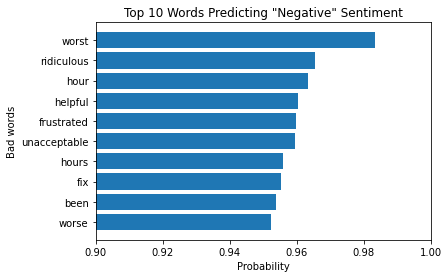

In [ ]:

plt.barh(y, x)

plt.title('Top 10 Words Predicting "Negative" Sentiment')
plt.xlabel('Probability')
plt.ylabel('Bad words')

plt.xlim([.9,1])
plt.show()

In [ ]:
roc_auc_score(y_test_oh,prediction_test_lg )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            #'max_features': [.1, .2, .3, ],
            'max_depth': [5,10, 20, 30],
            'n_estimators': [10, 50, 100, 300, 500]
        },
    
        cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_test_w_features, y_test_oh)
best_params = grid_result.best_params_

In [ ]:
print(best_params)
#max depth how deep it goes 
#n estimators how trees within the forest 

{'max_depth': 20, 'n_estimators': 300}


In [ ]:
best_rf = RandomForestClassifier(max_depth= 20, n_estimators= 300)

In [ ]:
best_rf = RandomForestClassifier(max_depth= 20, n_estimators= 300)

modelrf = RandomForestClassifier(max_depth= 20, n_estimators= 300)
# Train the model on training data
modelrf.fit(X_train_w_features, y_train_oh)

In [ ]:
modelrf = RandomForestClassifier(max_depth= 20, n_estimators= 300)
# Train the model on training data
modelrf.fit(X_train_w_features, y_train_oh)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
import numpy as np

In [ ]:
np.identity()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
prediction_test = modelrf.predict(X_test_w_features)

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

0.5393201950867504

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

0.5338572842101265

In [ ]:
#TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = modelrf.predict(X_test_w_features)
print(y_test_oh, prediction_test)

#from sklearn import metrics
#Print the prediction accuracy
#print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data



[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]


In [ ]:
modelrf2 = RandomForestClassifier(max_depth= 20, n_estimators= 300)
# Train the model on training data
modelrf.fit(X_train_w_features, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
modelrf.fit(X_train_w_features, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x = sm.add_constant(x)

In [ ]:
model = sm.OLS(X_train_oh, y_train)

NameError: ignored

In [ ]:
results = model.fit()


In [ ]:
results.params

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
rounded_labels=np.argmax(prediction_test, axis=1)
rounded_labels[1]

0

In [ ]:
from sklearn.metrics import mean_squared_error
#Print the prediction accuracy
print ("mean_squared_error = ", mean_squared_error(y_test_oh, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data
#One amazing feature of Random forest is that it provides us info on feature importances

# get the r2 
#mean2 squared error

mean_squared_error =  0.2547814


In [ ]:
from sklearn.metrics import mean_squared_error
#Print the prediction accuracy
print ("mean_squared_error = ", mean_squared_error(y_test_oh, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data
#One amazing feature of Random forest is that it provides us info on feature importances

# get the r2 
#mean2 squared error

mean_squared_error =  0.22176684


In [ ]:
print(best_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
y_pred1=modelrf.predict(X_test_oh)

In [ ]:
from sklearn.metrics import R2
from sklearn.metrics import mean_squared_error

ImportError: ignored

In [ ]:
print("R2 score",r2_score(y_test_oh,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test_oh,y_pred1)))


R2 score -0.18910403698116732
RMSE 0.46164355


In [ ]:
print("R2 score",r2_score(y_test_oh,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test_oh,y_pred1)))

NameError: ignored

In [ ]:
print(grid_result.best_score_)


0.8060113368460916
